# \#30DayMapChallenge - Day 3 - Polygons
Map for day 3 of the [\#30DayMapChallenge](https://30daymapchallenge.com/) 2024 for Náttúrufræðistofnun.\
This map has been produced using OpenStreetMap and the Reykjanes eruption surface polygons from Fagradalsfjall and Sunhnúkar to represent the size of the eruption compared to buildings in the Reykjanes peninsula in Iceland. All with a simple and clean polygons with a timeline for temporal reference. It is an easy step forward in mapping using Python and get more familiar with the tools. Enjoy playing with the map and make your own version.\
This notebook is published under CC BY 4.0 and can be cited: "*Credits: Náttúrufræðistofnun*" \
Author: Marco Pizzolato

## Install packages

In [ ]:
# Uncomment to install packages or add more if needed
!pip install osmnx matplotlib

In [19]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import requests
from shapely.geometry import Point
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.patches as mpatches
import warnings
# Suppress DeprecationWarnings and UserWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## Import the outline of Iceland
The polygon of the eruptions can be found here: 
[Sundhnúka](https://gis.natt.is/geoserver/LMI_vektor/wms?service=WMS&version=1.1.0&request=GetMap&layers=LMI_vektor%3Agos_Reykjanes_hraun_Grindavik_timalina&bbox=-22.457454681396484%2C63.83918380737305%2C-22.33460807800293%2C63.91109085083008&width=768&height=449&srs=EPSG%3A4326&styles=&format=application/openlayers) & 
[Fagradalsfjall](https://gis.natt.is/geoserver/LMI_vektor/wms?service=WMS&version=1.1.0&request=GetMap&layers=LMI_vektor%3Agos_Reykjanes_hraun&bbox=338951.71875%2C379822.53125%2C340745.75%2C381122.8125&width=768&height=556&srs=EPSG%3A3057&styles=&format=application/openlayers)

In [3]:
# URL of the GeoPackage
url1 = "https://gis.natt.is/geoserver/LMI_vektor/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=LMI_vektor%3Agos_Reykjanes_hraun_Grindavik_timalina&maxFeatures=100000&outputFormat=application%2Fx-gpkg"

# Download the GeoPackage
response = requests.get(url1)
with open("lava1.gpkg", "wb") as f:
    f.write(response.content)

# Load the GeoPackage using GeoPandas
sund_gdf = gpd.read_file("lava1.gpkg").to_crs(epsg=3057)

# URL of the GeoPackage
url2 = "https://gis.natt.is/geoserver/LMI_vektor/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=LMI_vektor%3Agos_Reykjanes_hraun&maxFeatures=100000&outputFormat=application%2Fx-gpkg"

# Download the GeoPackage
response = requests.get(url2)
with open("lava2.gpkg", "wb") as f:
    f.write(response.content)

# Load the GeoPackage using GeoPandas
fagra_gdf = gpd.read_file("lava2.gpkg").to_crs(epsg=3057)

## Get the polygons from OpenStreetMaps
Load the polygons using osmnx - https://osmnx.readthedocs.io/en/stable/

In [ ]:
tags={'building': True}

# Define the location
place = "Reykjanes Peninsula, Iceland"

# Retrieve buildings as polygons and reproject to EPSG:3057
buildings_gdf = ox.geometries_from_place(place, tags).to_crs(epsg=3057)

In [ ]:
# Filter out all lines and points to keep polygons
houses_gdf = buildings_gdf[buildings_gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]

In [ ]:
# Retrieve the polygon of the Reykjanes Peninsula and reproject to EPSG:3057
reykjanes_gdf = ox.geocode_to_gdf(place).to_crs(epsg=3057)

In [ ]:
# Fetch data for the specified place, filtering for aeroway features that are either runways or taxiways, reproject to EPSG:3057
airport_gdf = ox.geometries_from_place(place, tags={"aeroway": ["runway", "taxiway"]}).to_crs(epsg=3057)

# Apply a buffer and convert to polygons
airport_gdf['geometry'] = airport_gdf.geometry.apply(lambda geom: geom.buffer(10) if geom.type == 'LineString' else geom)

# Filter the GeoDataFrame to include only Polygon and MultiPolygon geometries
airport_gdf = airport_gdf[airport_gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]

## Plot the results

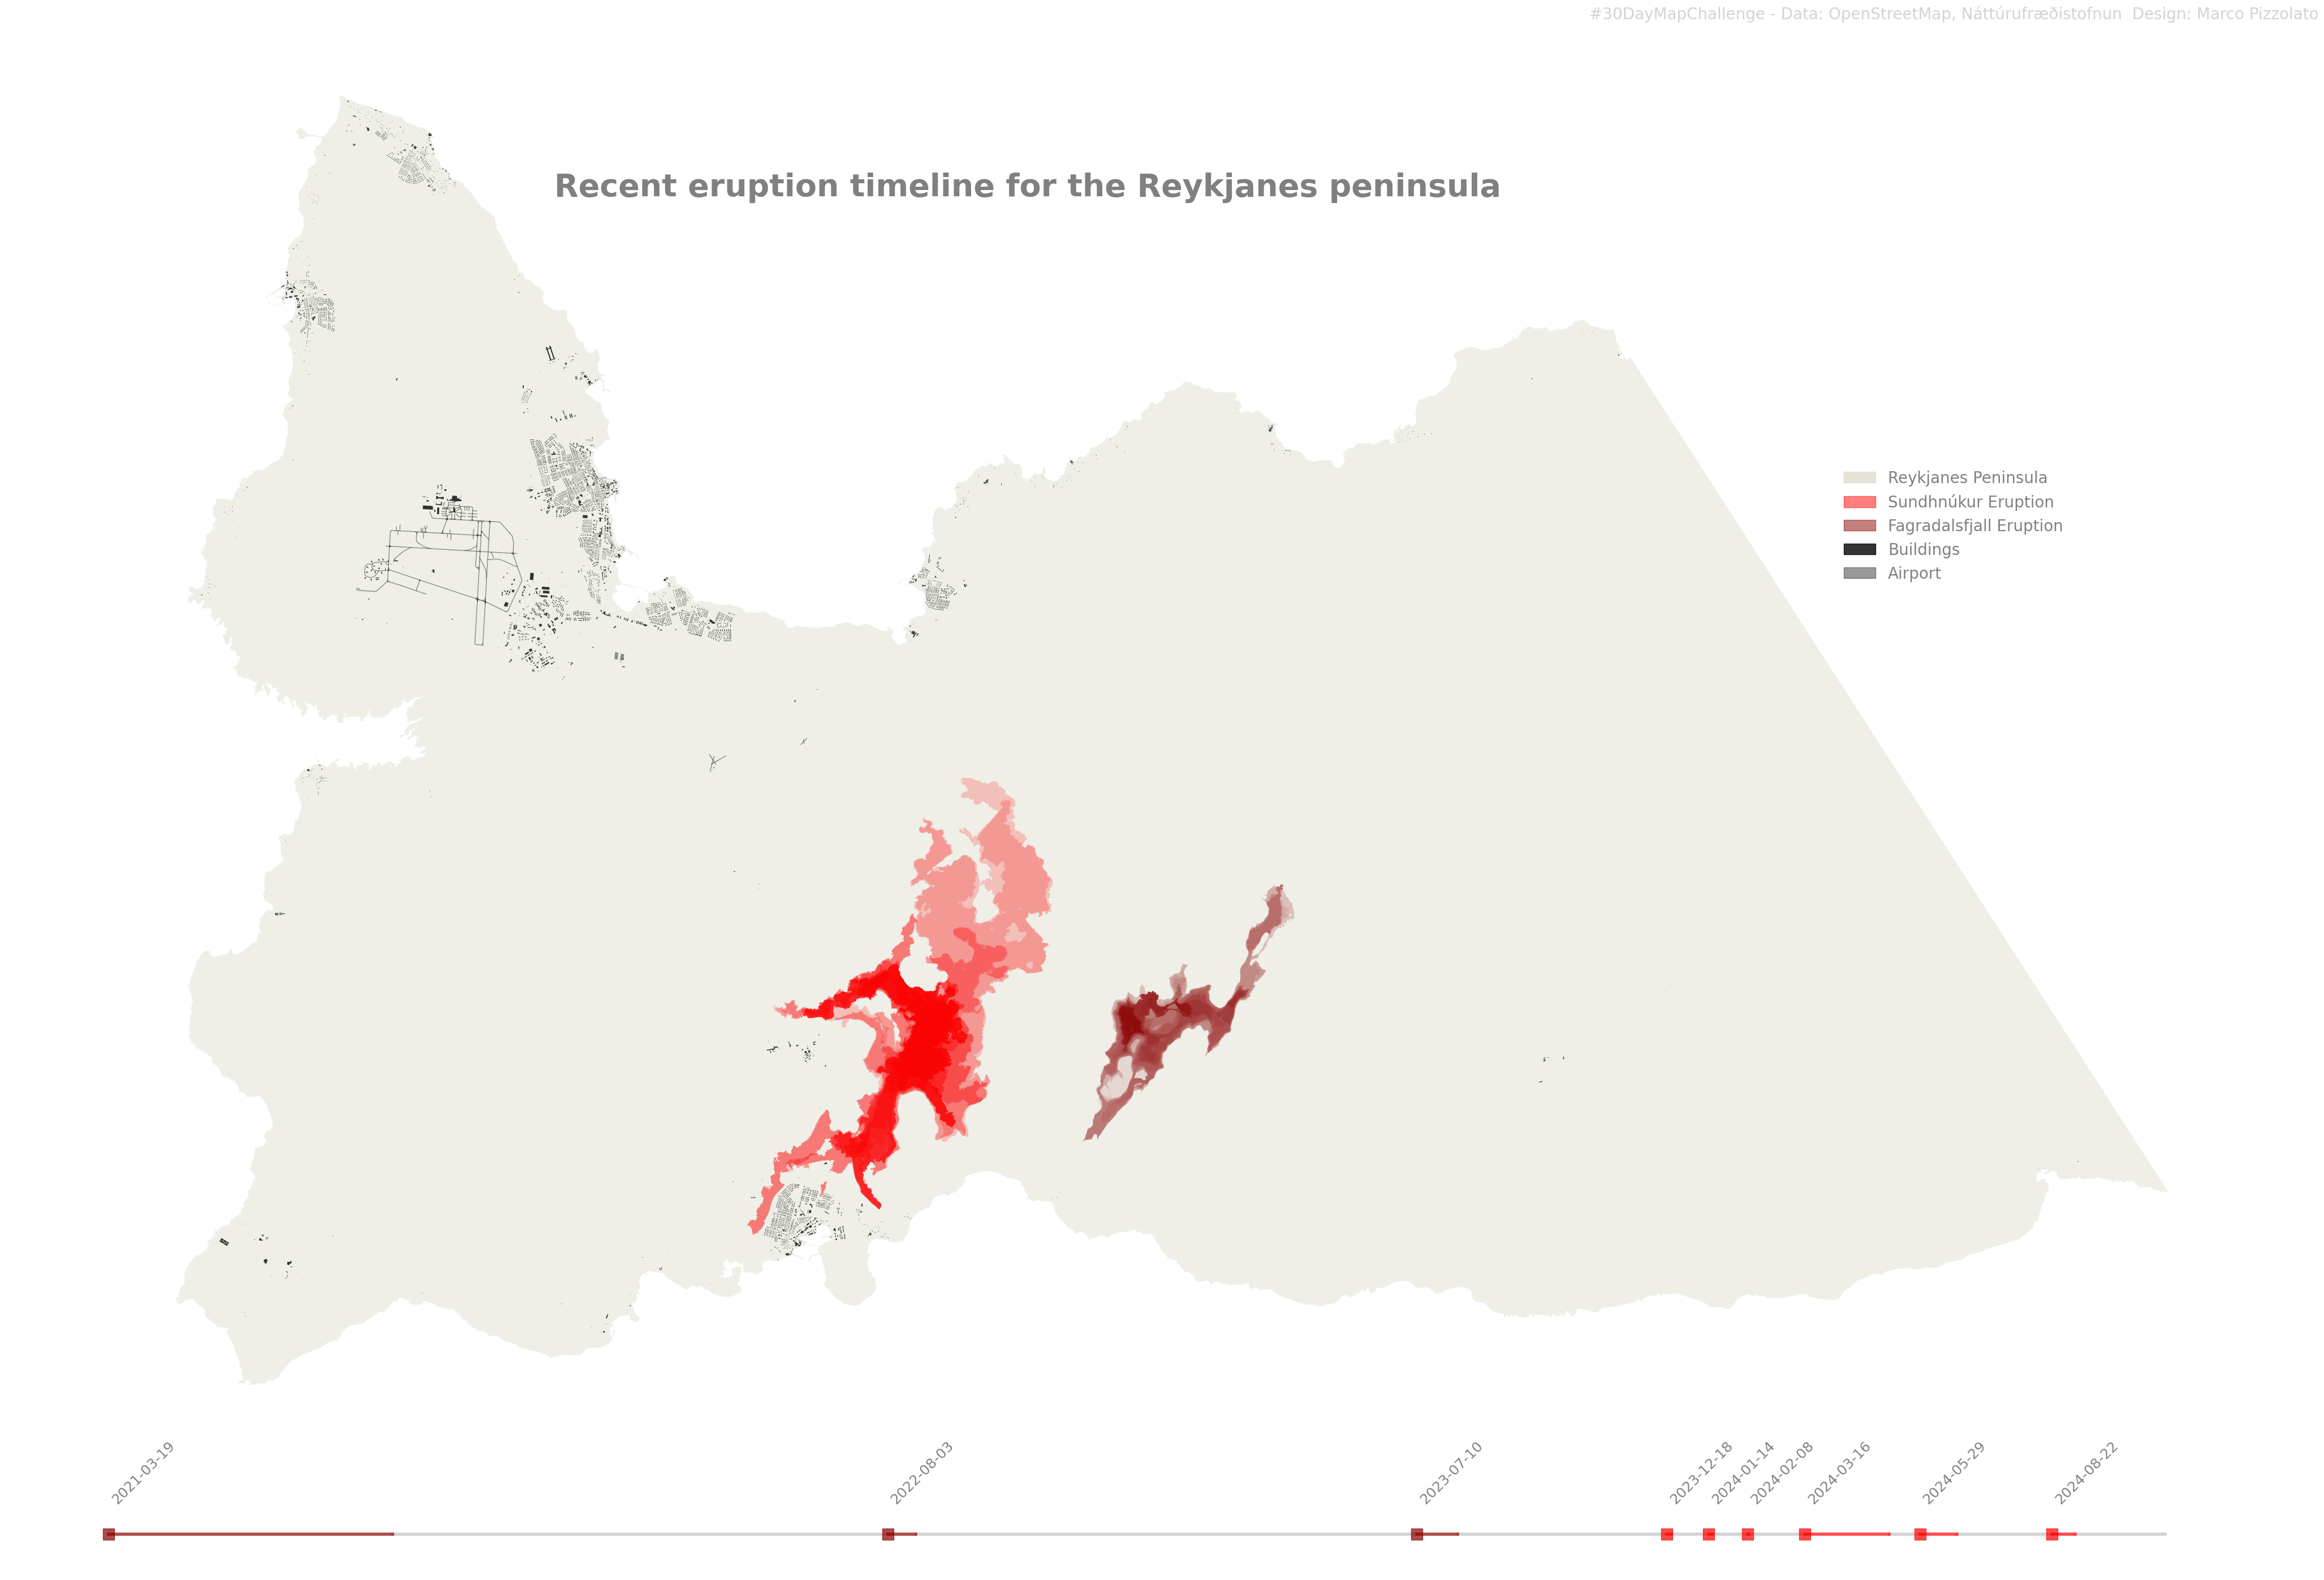

In [20]:
# Set up the plot
fig, ax = plt.subplots(figsize=(50, 50))

# Plot each layer with distinct styling
reykjanes_gdf.plot(ax=ax, color='#d9d8c7', alpha=0.4)
sund_gdf.plot(ax=ax, color='red', alpha=0.2)
fagra_gdf.plot(ax=ax, color='darkred', alpha=0.1)
houses_gdf.plot(ax=ax, color='black', alpha=0.8)
airport_gdf.plot(ax=ax, color='black', alpha=0.4)

# Remove axis
ax.axis("off")

#_______________________________________________________________________________________________________________#
# Add a legend with custom labels
legend_elements = [
    mpatches.Patch(color='#d9d8c7', alpha=0.7, label='Reykjanes Peninsula'),
    mpatches.Patch(color='red', alpha=0.5, label='Sundhnúkur Eruption'),
    mpatches.Patch(color='darkred', alpha=0.5, label='Fagradalsfjall Eruption'),
    mpatches.Patch(color='black', alpha=0.8, label='Buildings'),
    mpatches.Patch(color='black', alpha=0.4, label='Airport')
]
legend = ax.legend(handles=legend_elements, bbox_to_anchor=(0.8, 0.7), loc="upper left", frameon=False, fontsize=20)

# Change the color of each text label in the legend
for text in legend.get_texts():
    text.set_color("grey")

# Customize the title
ax.text(0.65, 0.9, "Recent eruption timeline for the Reykjanes peninsula", ha='right', va='top', transform=ax.transAxes, fontsize=40, weight='bold', color='grey')

# Add credits
plt.figtext(0.66,0.75,'#30DayMapChallenge - Data: OpenStreetMap, Náttúrufræðistofnun  Design: Marco Pizzolato', fontsize = 20, color='lightgrey')

#_______________________________________________________________________________________________________________#
# Make timeline dataset
eruption_data = pd.DataFrame({
    "Name": [
        "Fagradalsfjall", "Fagradalsfjall", "Litli-Hrutur",
        "Sundhnúkur", "Sundhnúkur", "Sundhnúkur",
        "Sundhnúkur", "Sundhnúkur", "Sundhnúkur"
    ],
    "Start": [
        "2021-03-19", "2022-08-03", "2023-07-10",
        "2023-12-18", "2024-01-14", "2024-02-08",
        "2024-03-16", "2024-05-29", "2024-08-22"
    ],
    "End": [
        "2021-09-18", "2022-08-21", "2023-08-05",
        "2023-12-21", "2024-01-16", "2024-02-09",
        "2024-05-09", "2024-06-22", "2024-09-06"
    ]
})

# Ensure all dates are in datetime format
eruption_data['Start'] = pd.to_datetime(eruption_data['Start'])
eruption_data['End'] = pd.to_datetime(eruption_data['End'])

# Define the final date for the timeline
final_date = pd.to_datetime("2024-11-03")

# Create the horizontal timeline
timeline_ax = fig.add_axes([0.1, 0.2, 0.8, 0.05])

# Draw black lines between eruptions
for i in range(len(eruption_data) - 1):
    gap_start = eruption_data.iloc[i]['End']
    gap_end = eruption_data.iloc[i + 1]['Start']
    timeline_ax.plot([mdates.date2num(gap_start), mdates.date2num(gap_end)], [1, 1], color="lightgrey", linewidth=4)

# Add final black line from the end of the last eruption to November 3, 2024
last_end_date = eruption_data.iloc[-1]['End']
timeline_ax.plot([mdates.date2num(last_end_date), mdates.date2num(final_date)], [1, 1], color="lightgrey", linewidth=4)

for i in range(len(eruption_data)):
    start_date = eruption_data.iloc[i]['Start']
    end_date = eruption_data.iloc[i]['End']
    volcano_name = eruption_data.iloc[i]['Name']
    start_num = mdates.date2num(start_date)
    end_num = mdates.date2num(end_date)

    # Set color and transparency based on the volcano name
    if volcano_name in ["Fagradalsfjall", "Litli-Hrutur"]:
        line_color = "darkred"
        line_alpha = 0.7
    elif volcano_name == "Sundhnúkur":
        line_color = "red"
        line_alpha = 0.7

    # Draw the line for each eruption period
    timeline_ax.plot([start_num, end_num], [1, 1], color=line_color, linewidth=4, alpha=line_alpha)

    # Add larger square marker at the start of each eruption
    timeline_ax.plot(start_num, 1, "s", color=line_color, markersize=15, alpha=line_alpha)

    # Label each date closer to the square marker, with a slight rightward shift to match on timeline
    timeline_ax.text(start_num + 0.5, 1.15, f"{start_date.strftime('%Y-%m-%d')}",
                     ha='left', rotation=45, fontsize=18, color='grey')

# Customize the timeline axes
timeline_ax.set_ylim(0.8, 1.5)
timeline_ax.axis("off")  # Turn off the timeline axis for a clean look

fig.show()

## Save

In [21]:
# Save the figure as a PNG with transparency preserved
fig.savefig("Day03-Polygons.png", format='png', dpi=300, bbox_inches='tight')